# Building a brain object

Brain objects are supereeg's fundamental data structure for a single subject's iEEG data.  To create one at minimum you'll need a matrix of neural recordings (time samples by electrodes), electrode locations, and a sample rate. Additionally, you can include information about separate recording sessions and store custom meta data. In this tutorial, we'll build a brain object from scratch and get familiar with some of the methods.

# Load in the required libraries

In [1]:
import supereeg as se
import numpy as np
import warnings 
warnings.simplefilter("ignore")
%matplotlib inline

# Simulate some data

First, we'll use supereeg's built in simulation functions to simulate some data and electrodes. By default, the `simulate_data` function will return a 1000 samples by 10 electrodes matrix, but you can specify the number of time samples with `n_samples` and the number of electrodes with `n_elecs`. If you want further information on simulating data, check out the simulate tutorial!

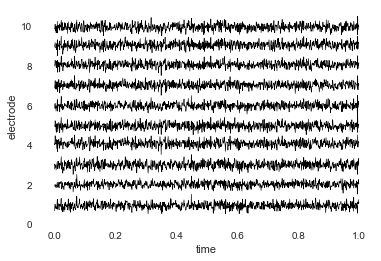

In [7]:
# simulate some data
bo_data = se.simulate_bo(n_samples=1000, sessions=2, n_elecs=10)

# plot it
bo_data.plot_data()

# get just data
data = bo_data.get_data()

We'll also simulate some electrode locations

In [8]:
locs = se.simulate_locations()
print(locs)

    x   y   z
0 -47 -27  36
1 -38  13 -41
2 -27  -1 -34
3 -17 -25  23
4 -13   9  37
5   0  -2 -10
6  11 -44 -48
7  21   4 -45
8  35 -33  40
9  47 -36  11


# Creating a brain object

To construct a new brain objects, simply pass the data and locations to the `Brain` class like this:

In [9]:
bo = se.Brain(data=data, locs=locs, sample_rate=100)

To view a summary of the contents of the brain object, you can call the `info` function:

In [10]:
bo.info()

Number of electrodes: 10
Recording time in seconds: [10.]
Sample Rate in Hz: [100]
Number of sessions: 1
Date created: Thu Mar 29 19:48:15 2018
Meta data: {}


Optionally, you can pass a `sessions` parameter, which is can be a numpy array or list the length of your data with a unique identifier for each session.  For example:

In [11]:
sessions = np.array([1]*(data.shape[0]/2)+[2]*(data.shape[0]/2))
bo = se.Brain(data=data, locs=locs, sample_rate=1000, sessions=sessions)
bo.info()

Number of electrodes: 10
Recording time in seconds: [0.5 0.5]
Sample Rate in Hz: [1000, 1000]
Number of sessions: 2
Date created: Thu Mar 29 19:49:36 2018
Meta data: {}


You can also add custom meta data to the brain object to help keep track of its contents. `meta` is a dictionary comprised of whatever you want:

In [12]:
meta = {
    'subjectID' : '123',
    'Investigator' : 'Andy',
    'Hospital' : 'DHMC'
}
bo = se.Brain(data=data, locs=locs, sample_rate=1000, sessions=sessions, meta=meta)
bo.info()

Number of electrodes: 10
Recording time in seconds: [0.5 0.5]
Sample Rate in Hz: [1000, 1000]
Number of sessions: 2
Date created: Thu Mar 29 19:49:45 2018
Meta data: {'Hospital': 'DHMC', 'subjectID': '123', 'Investigator': 'Andy'}


# Initialize brain objects

Brain objects can be initialized by passing a brain object (ending in `.bo`), but can also be initialized with a model object or nifti object by specifying `return_type` as `bo` in the load function or passing the model object or nifti object to `Brain()`.  

For example, you can load a nifti object as a brain object: 

In [13]:
bo_nii = se.load('example_nifti', return_type='bo')

Or you can:

In [15]:
bo_nii = se.Brain('example_nifti')

Another feature, which can be particularly useful when working with lots of data, is loading only a subfield by specifiying `field`.  For example, if you only want to load locations:

In [16]:
bo_locs = se.load('example_data', field='locs') 

# The structure of a brain object

Inside the brain object, the iEEG data is stored as a Pandas DataFrame that can be accessed with the `get_data` function:

In [17]:
bo.get_data().head()

,0,1,2,3,4,5,6,7,8,9
0,-1.282515,-0.580940,-0.864646,0.065901,0.034791,-0.574941,-0.965809,-0.282706,-0.485026,-0.421990
1,0.143105,-0.247108,0.181906,-0.320332,-0.063978,0.262450,-0.094468,0.070230,0.061538,-0.075396
2,0.318428,0.046987,-0.101492,2.334151,1.408494,0.487313,1.638895,1.140865,0.584100,0.608968
3,-0.642765,-0.561744,-0.512502,0.129953,-0.186334,-0.561900,-1.160690,0.176538,-0.205032,-0.734297
4,-0.142131,-0.289413,-0.148444,0.005748,0.046294,-0.062348,0.019733,0.016867,-0.593105,0.034721


Similarly, the electrode locations are stored as a Pandas DataFrame, and can be retrieved using the `get_locs` method:

In [18]:
bo.get_locs().head()

,x,y,z
0,-47,-27,36
1,-38,13,-41
2,-27,-1,-34
3,-17,-25,23
4,-13,9,37


Brain objects are iterable, so you index a brain object like this:

In [19]:
#return first time sample
bo[0]
#return first 3 time samples
bo[:3] 
#return first electrode
bo[:, 0] 
#returns first 3 timesamples/elecs
bo_i = bo[:3, :3] 
bo_i.get_data()

,0,1,2
0,-1.282515,-0.580940,-0.864646
1,0.143105,-0.247108,0.181906
2,0.318428,0.046987,-0.101492


You can also pass a list of indices for either `times` or `locs` to the `get_slice` method and return a subset of the brain object

In [20]:
bo_s = bo.get_slice(sample_inds=[0,1,2], loc_inds=[0,1,2])
bo_s.get_data()

,0,1,2
0,-1.282515,-0.580940,-0.864646
1,0.143105,-0.247108,0.181906
2,0.318428,0.046987,-0.101492


You can resample your data by specifying a new resample rate

In [21]:
bo.resample(64)
bo.info()

Number of electrodes: 10
Recording time in seconds: [0.5 0.5]
Sample Rate in Hz: [64, 64]
Number of sessions: 2
Date created: Thu Mar 29 19:49:45 2018
Meta data: {'Hospital': 'DHMC', 'subjectID': '123', 'Investigator': 'Andy'}


You can also plot both the data and the electrode locations:

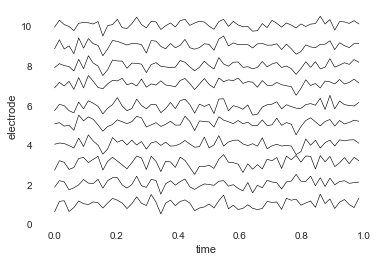

In [22]:
bo.plot_data()

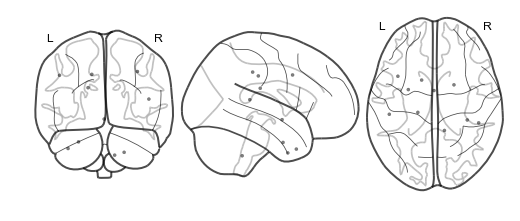

In [23]:
bo.plot_locs()

The other pieces of the brain object are listed below:

In [24]:
# array of session identifiers for each timepoint
sessions = bo.sessions

# number of sessions
n_sessions = bo.n_sessions

# sample rate
sample_rate = bo.sample_rate

# number of electrodes
n_elecs = bo.n_elecs

# length of each recording session in seconds
n_seconds = bo.n_secs

# the date and time that the bo was created
date_created = bo.date_created

# kurtosis of each electrode
kurtosis = bo.kurtosis

# meta data
meta = bo.meta

# label delinieating observed and reconstructed locations
label = bo.label

# Brain object methods

There are a few other useful methods on a brain object

## `bo.info()`

This method will give you a summary of the brain object:

In [25]:
bo.info()

Number of electrodes: 10
Recording time in seconds: [0.5 0.5]
Sample Rate in Hz: [64, 64]
Number of sessions: 2
Date created: Thu Mar 29 19:49:45 2018
Meta data: {'Hospital': 'DHMC', 'subjectID': '123', 'Investigator': 'Andy'}


## `bo.get_data()`

In [26]:
data_array = bo.get_data()

## `bo.get_zscore_data()`

This method will return a numpy array of the zscored data:

In [27]:
zdata_array = bo.get_zscore_data()

## `bo.get_locs()`

This method will return a numpy array of the electrode locations:

In [28]:
locs = bo.get_locs()

## `bo.get_slice()`
This method allows you to slice out time and locations from the brain object, and returns a brain object. This can occur in place if you set the flag `inplace=True`.

In [29]:
bo_slice = bo.get_slice(sample_inds=None, loc_inds=None, inplace=False)

## `bo.resample()`
This method allows you resample a brain object in place. 

In [30]:
bo.resample(resample_rate=None)

## `bo.plot_data()`

This method normalizes and plots data from brain object:

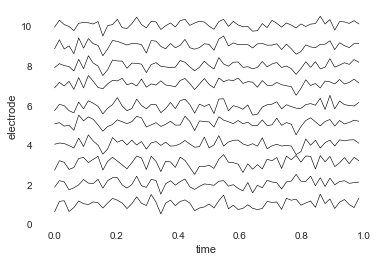

In [31]:
bo.plot_data()

## `bo.plot_locs()`
This method plots electrode locations from brain object:

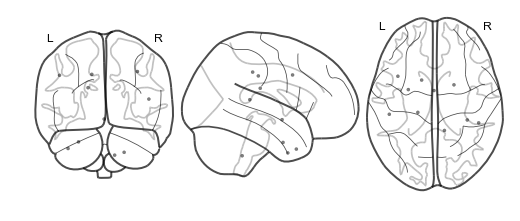

In [32]:
bo.plot_locs()

## `bo.to_nii()`

This method converts the brain object into supereeg's `nifti` class (a subclass of the `nibabel` nifti class).  If `filepath` is specified, the nifti file will be saved. You can also specify a nifti template with the `template` argument. If no template is specified, it will use the gray matter masked MNI 152 brain downsampled to 6mm.  

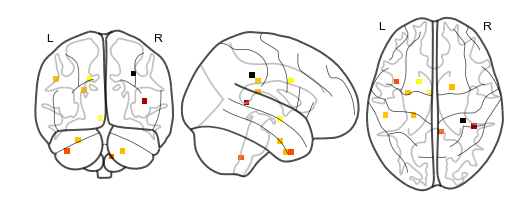

In [34]:
# convert to nifti
nii = bo.to_nii(template='gray', vox_size=6)

# plot first timepoint
nii.plot_glass_brain()

# save the file
# nii = bo.to_nii(filepath='/path/to/file/brain')

# specify a template and resolution
# nii = bo.to_nii(template='/path/to/nifti/file.nii', vox_size=20)

## `bo.save(fname='something')`

This method will save the brain object to the specified file location.
The data will be saved as a 'bo' file, which is a dictionary containing the elements of a brain object saved in the hd5 format using `deepdish`.

In [35]:
#bo.save(fname='brain_object')